<a href="https://colab.research.google.com/github/LongNguyen1984/DeepLearning/blob/master/DataProcessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from pandas import read_csv

dataset = read_csv('drive/My Drive/InvertPhaseLong2.csv', header=0)

               850nm          640nm  ...  Channel 7  Channel 8
count   20665.000000   20665.000000  ...    20665.0    20665.0
mean   817663.068764 -777540.398306  ...        0.0        0.0
std     26649.696060   13677.458630  ...        0.0        0.0
min         0.000000 -823380.000000  ...        0.0        0.0
25%    808706.000000 -785469.000000  ...        0.0        0.0
50%    826957.000000 -773174.000000  ...        0.0        0.0
75%    834737.000000 -767922.000000  ...        0.0        0.0
max    857234.000000 -752898.000000  ...        0.0        0.0

[8 rows x 8 columns]


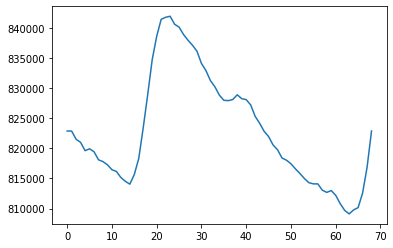

In [3]:
from matplotlib import pyplot

print(dataset.describe())
data = dataset.values
ppg1 = data[:,0]
pyplot.plot(ppg1[1:70])
pyplot.show()

# Segment data to N row

In [4]:
from pandas import read_csv
from pandas import DataFrame
import numpy as np

def load_data(filename):
  dataset = read_csv(filename, header=0);
  data = dataset.values;
  return data
def segment_data(signal, distance, overlap):
  i = 1;
  s = list()
  while i < len(signal):
    a = signal[int(i):int(i+distance)];
    s.append(a)
    i = i + distance*overlap
    
  return s

data = load_data('drive/My Drive/InvertPhaseLong2.csv')  
ppg = segment_data(data[:,0],70,0.5)
ppg1 = segment_data(data[:,2],70,0.5)
s1 = np.asarray(ppg) # convert to array
s2 = np.asarray(ppg1) # convert to array

In [19]:
s1 = np.array(s1)
print(s1[69])

(70,)


In [71]:
# label for first group of Data
y1 = [1]*s1.shape[0];
y2 = [0]*s2.shape[0]
y1 = np.asarray(y1)
y2 = np.asarray(y2)
y1.shape, y2.shape
ydf1 = DataFrame(y1)
ydf2 = DataFrame(y2)

In [8]:
s1.reshape((591,70))

ValueError: ignored

In [50]:
i = 1;
distance = 70;
overlap = 0.5;
ppg = list()
while i < len(ppg1):
  a = ppg1[int(i):int(i+distance)];
  ppg.append(a)
  i = i + distance*overlap


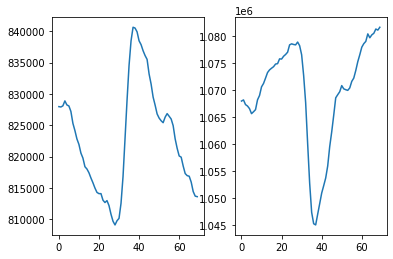

In [58]:
pyplot.subplot(121)
pyplot.plot(ppg[1])

pyplot.subplot(122)
pyplot.plot(ppg1[302])


pyplot.show()

In [62]:
# convert ppg to array
import numpy as np
from pandas import DataFrame


df1= DataFrame(s1)
df2= DataFrame(s2)
print(df1.shape)
print(df2.shape)

(591, 1)
(591, 1)


In [59]:
# check correlate
from pandas import Series

t1 = Series(ppg1[302])
t2 = Series(ppg[1])
t1.corr(t2, method='pearson')

-0.8875684805714731

# Tranining the model

Scaler Data

In [61]:
s1.shape

(591,)

In [64]:
from sklearn.preprocessing import MinMaxScaler
# define min max scaler
scaler = MinMaxScaler()
# transform data
scaled1 = scaler.fit_transform(df1[0])
scaled2 = scaler.fit_transform(df2[0])

ValueError: ignored

In [65]:
# cnn model
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D

model = Sequential()
n_timesteps = 70
n_features= 1
n_outputs=2;
model.add(Conv1D(filters=64, kernel_size=1, activation='relu', input_shape=(n_timesteps, n_features)))
model.add(Conv1D(filters=64, kernel_size=1, activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(n_outputs, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [70]:
type(df1)

pandas.core.frame.DataFrame

In [72]:
verbose, epochs, batch_size = 0, 10, 32
# fit network
model.fit(df1, ydf1, epochs=epochs, batch_size=batch_size, verbose=verbose)

ValueError: ignored